<a href="https://colab.research.google.com/github/Vk13io/Stock-price-prediction/blob/main/HUBBLEMIND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Replace 'filename.csv' with the actual name of your uploaded file
df = pd.read_csv('Stock Market Dataset.csv')
print("Initial DataFrame:")
print(df.head())

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Print data types to confirm the conversion
print("\nData Types After Conversion:")
print(df.dtypes)

# Optionally handle missing or incorrect dates
# Drop rows with missing dates
df = df.dropna(subset=['Date'])

# Or fill missing dates with a specific value, e.g., '2024-01-01'
# df['Date'] = df['Date'].fillna(pd.Timestamp('2024-01-01'))

# Print the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())

# Check data types, missing values, and basic statistics
print("\nDataFrame Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values Count:")
print(df.isna().sum())

# Handle missing values for numerical columns by filling with the median
df.fillna(df.median(numeric_only=True), inplace=True)



In [ ]:
# Check data types, missing values, and basic statistics
print(df.info())
print(df.describe())
print(df.isna().sum())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of the target variable (Amazon_Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Amazon_Price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Amazon Stock Prices')
plt.xlabel('Amazon Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:

# Plot density plot of the target variable (Amazon_Price)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Amazon_Price'].dropna(), fill=True)
plt.title('Density Plot of Amazon Stock Prices')
plt.xlabel('Amazon Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [ ]:

# Pair plot of selected features with Amazon_Price
features = ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 'Platinum_Price']  # Add other relevant features as needed
sns.pairplot(df[['Amazon_Price'] + features])
plt.suptitle('Pair Plot of Amazon_Price and Selected Features', y=1.02)
plt.show()



In [ ]:
# Compute the correlation matrix only for numeric columns
numeric_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(14, 10))
for feature in numeric_features:
    if feature != 'Amazon_Price':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['Amazon_Price'])
        plt.title(f'Relationship between Amazon Price and {feature}')
        plt.xlabel(feature)
        plt.ylabel('Amazon Price')
        plt.grid(True)
        plt.show()






In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:

# Task 3: Feature Engineering

# Handle missing values by filling them with the mean of the respective columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# Standardise the features using StandardScaler
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the processed DataFrame
print("\nProcessed DataFrame:")
print(df.head())



In [ ]:
df.info()  # This will show you the data types of all columns


In [ ]:
# Convert 'Date' column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Create new features from the date, e.g., year, month, day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Optionally, drop the original 'Date' column if no longer needed
df = df.drop('Date', axis=1)


In [ ]:
# Remove commas and convert to float for the entire dataframe
df = df.replace({',': ''}, regex=True).astype(float)
# Check data types of columns
print(df.dtypes)


In [ ]:
#Week 2: Model Development
# Define features (X) and target (y)
X = df.drop('Amazon_Price', axis=1)
y = df['Amazon_Price']





In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 0.14829647834090484
MSE: 0.03474293882501696
RMSE: 0.18639457831443745


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive and calculate the mean and standard deviation
cv_scores = -cv_scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Cross-Validation Mean MSE: {mean_cv_score}")
print(f"Cross-Validation Std MSE: {std_cv_score}")


Cross-Validation Mean MSE: 0.5542474017544856
Cross-Validation Std MSE: 0.43322710871825637


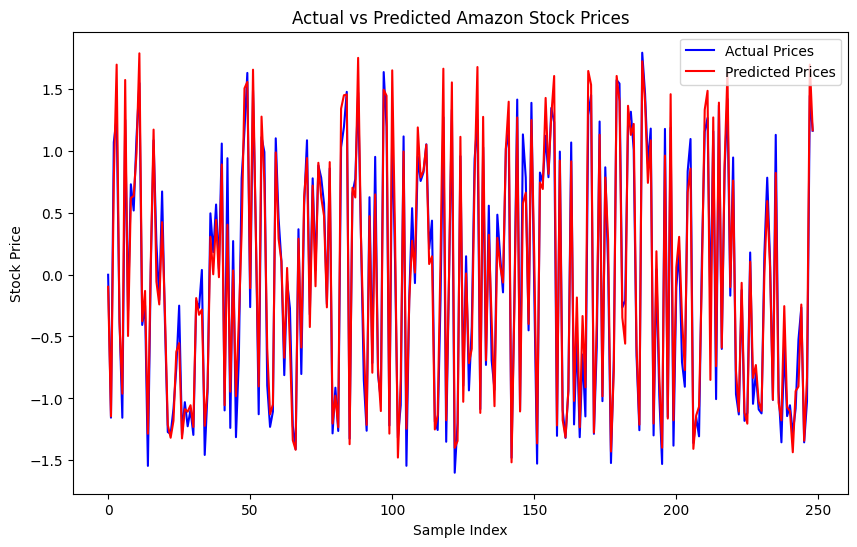

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='b')
plt.plot(y_pred, label='Predicted Prices', color='r')
plt.title('Actual vs Predicted Amazon Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


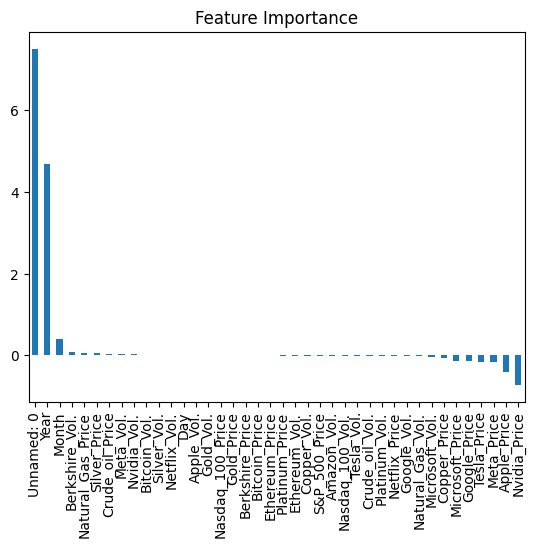

In [ ]:
feature_importance = pd.Series(model.coef_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot the feature importance
feature_importance.plot(kind='bar', title='Feature Importance')
plt.show()
